<a href="https://colab.research.google.com/github/sampritibanerjee/Data-visualization/blob/main/Data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("student_scores.csv")
print(df.head())

   Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0           0  female         NaN   bachelor's degree      standard     none   
1           1  female     group C        some college      standard      NaN   
2           2  female     group B     master's degree      standard     none   
3           3    male     group A  associate's degree  free/reduced     none   
4           4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  W

In [ ]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [ ]:
df.info()  #types of data present into a col

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [ ]:
#droping unnane col
df=df.drop("Unnamed: 0",axis=1)

In [ ]:
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


# **Gender distribution**

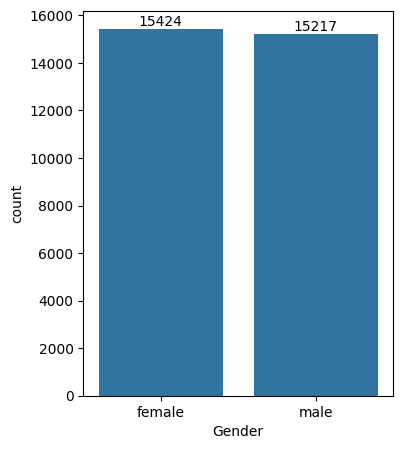

In [ ]:
plt.figure(figsize=(4,5))  #chnage the size of the graph
ax=sns.countplot(data=df,x="Gender")
# for exact count
ax.bar_label(ax.containers[0])
plt.show()

In [ ]:
gb=df.groupby("ParentEduc").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
print(gb)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


# heatmap

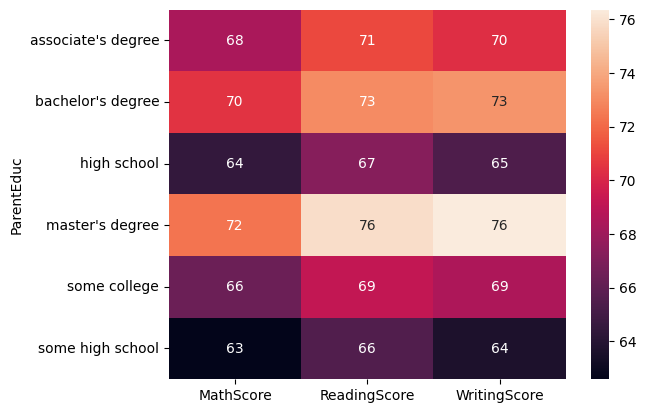

In [ ]:
#heat map for dealing with string and int diff value
# sns.heatmap(gb)
# with value
sns.heatmap(gb,annot=True)
plt.show()

# bubble chart

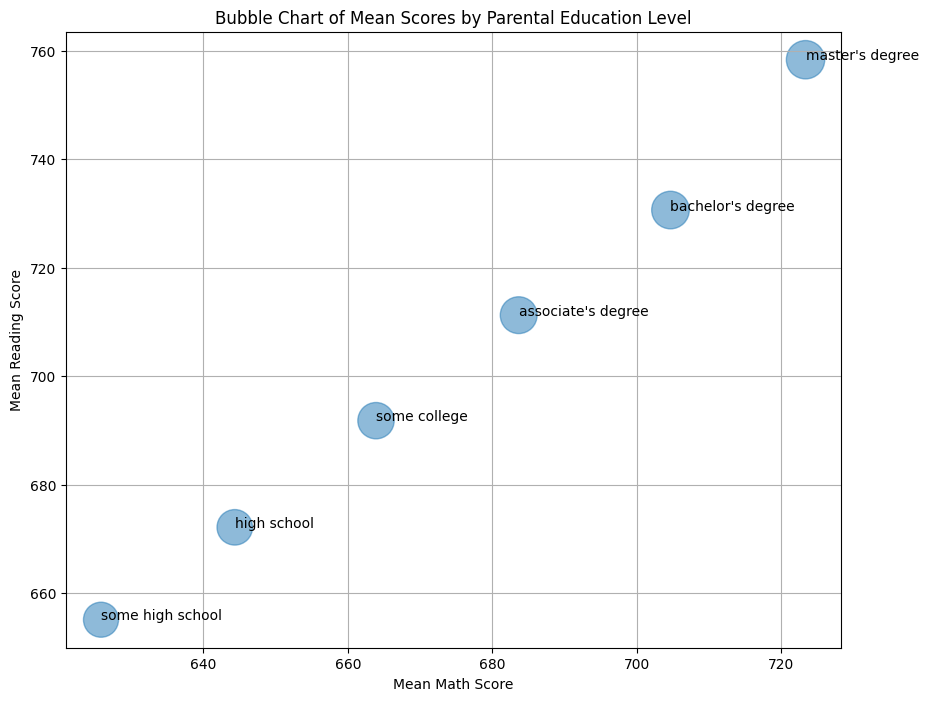

In [ ]:
# Extracting data for bubble chart
parent_education_levels = gb.index
math_scores = gb['MathScore']
reading_scores = gb['ReadingScore']
writing_scores = gb['WritingScore']

# Scaling scores for better visualization
math_scores_scaled = math_scores * 10
reading_scores_scaled = reading_scores * 10
writing_scores_scaled = writing_scores * 10

# Plotting the bubble chart
plt.figure(figsize=(10, 8))
plt.scatter(math_scores_scaled, reading_scores_scaled, s=writing_scores_scaled, alpha=0.5)

# Adding labels and title
plt.title('Bubble Chart of Mean Scores by Parental Education Level')
plt.xlabel('Mean Math Score')
plt.ylabel('Mean Reading Score')

# Adding annotations for each bubble
for i, txt in enumerate(parent_education_levels):
    plt.annotate(txt, (math_scores_scaled[i], reading_scores_scaled[i]))

plt.grid(True)
plt.show()


In [ ]:
#from the above chart we have conclude the parents have good impact

# **boxplot**

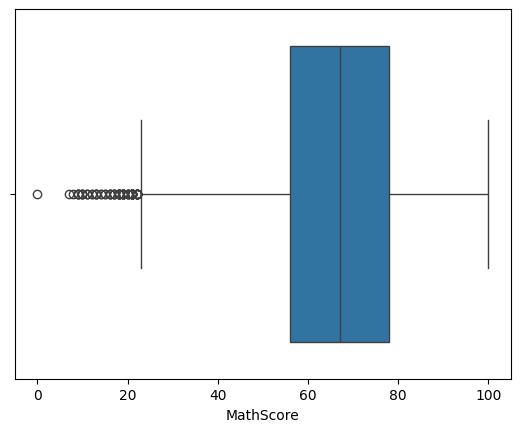

In [ ]:
sns.boxplot(data=df,x="MathScore")
plt.show()

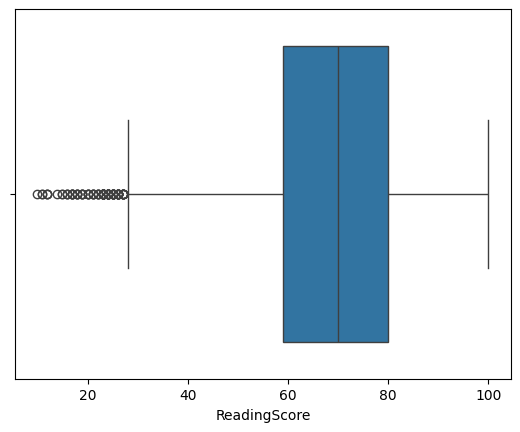

In [ ]:
sns.boxplot(data=df,x="ReadingScore")
plt.show()

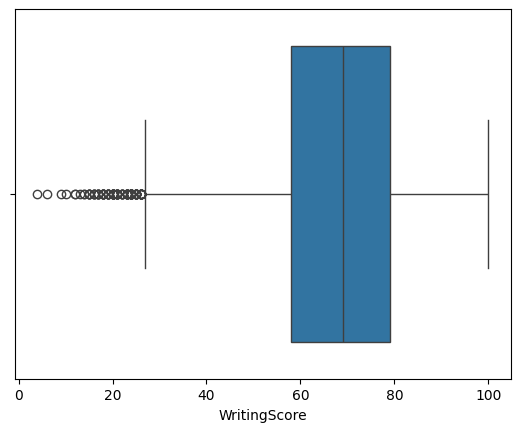

In [ ]:
sns.boxplot(data=df,x="WritingScore")
plt.show()

In [ ]:
print(df["EthnicGroup"].unique())

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


# Distribution of ethnic group

In [ ]:
groupA=df.loc[(df["EthnicGroup"]=="group A")].count()

In [ ]:
groupA

Gender                 2219
EthnicGroup            2219
ParentEduc             2078
LunchType              2219
TestPrep               2081
ParentMaritalStatus    2121
PracticeSport          2167
IsFirstChild           2168
NrSiblings             2096
TransportMeans         1999
WklyStudyHours         2146
MathScore              2219
ReadingScore           2219
WritingScore           2219
dtype: int64

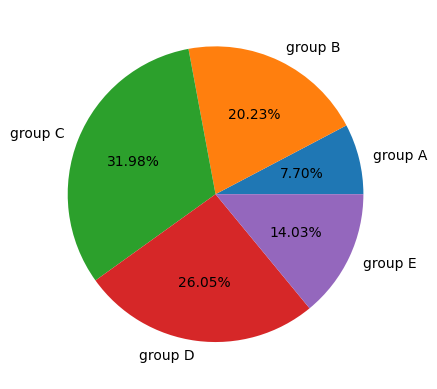

In [ ]:
groupB=df.loc[(df["EthnicGroup"]=="group B")].count()
groupC=df.loc[(df["EthnicGroup"]=="group C")].count()
groupD=df.loc[(df["EthnicGroup"]=="group D")].count()
groupE=df.loc[(df["EthnicGroup"]=="group E")].count()
leb=['group A', 'group B' ,'group C', 'group D', 'group E']
mlist=[groupA["EthnicGroup"],groupB["EthnicGroup"],groupC["EthnicGroup"],groupD["EthnicGroup"],groupE["EthnicGroup"]]
plt.pie(mlist,labels=leb,autopct="%1.2f%%") # autopct for percentage
plt.show()

# **scatter** **plot**

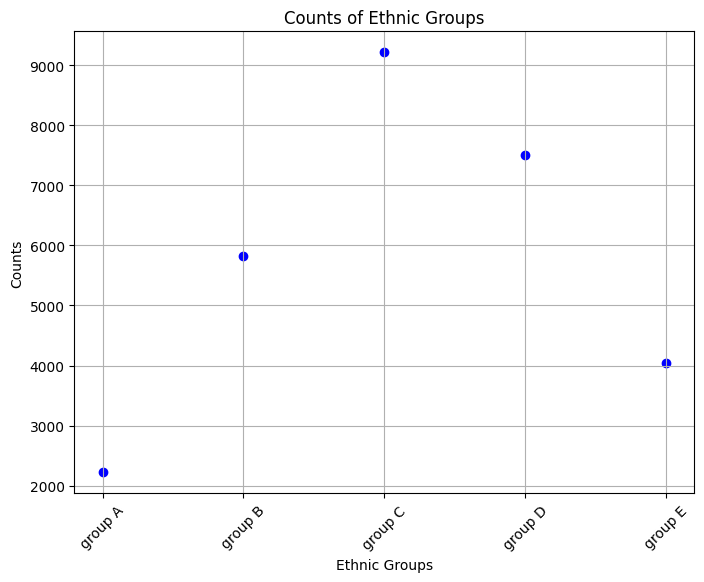

In [ ]:
ethnic_groups = ['group A', 'group B', 'group C', 'group D', 'group E']
counts = [groupA["EthnicGroup"], groupB["EthnicGroup"], groupC["EthnicGroup"], groupD["EthnicGroup"], groupE["EthnicGroup"]]

plt.figure(figsize=(8, 6))
plt.scatter(ethnic_groups, counts, color='blue')
plt.title('Counts of Ethnic Groups')
plt.xlabel('Ethnic Groups')
plt.ylabel('Counts')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


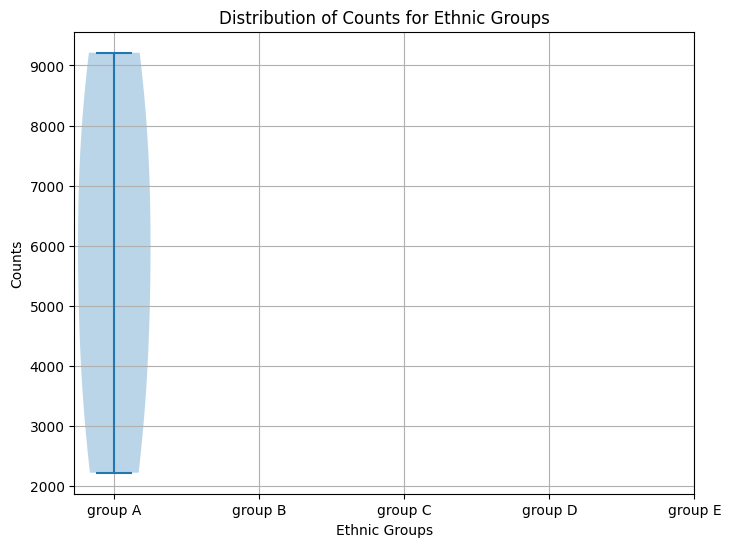

In [ ]:
plt.figure(figsize=(8, 6))
plt.violinplot(counts)
plt.title('Distribution of Counts for Ethnic Groups')
plt.xlabel('Ethnic Groups')
plt.ylabel('Counts')
plt.xticks(ticks=range(1, len(ethnic_groups) + 1), labels=ethnic_groups)
plt.grid(True)
plt.show()